# CLustering is the ML unsupervised methods,used to group the data based on similaries in the data - Hierarchial clustering 

# Hierarchial clustering

--similar records will be clubbed together 

--DO EDA process - not mandatory(few are mandatory)

--scale the data

--calculate the distance - Euclidean or manhatten

--cluster the records based on single/complete link ('least /farthest ' distance)

--divide in the clusters into 2 or 3 classes based on the requirement

--use dendogram to visualise the clustered data

--join the classes with main data

In [ ]:
import os

In [ ]:
import pandas as pd

In [ ]:
# Reading the dataset
data = pd.read_csv('segmentation data.csv',header='infer')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [ ]:
data.shape

(2000, 8)

In [ ]:
data.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [ ]:
cor = data.corr()
cor

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,1.000000,0.328262,0.074403,-0.085246,0.012543,-0.303217,-0.291958,-0.378445
Sex,0.328262,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.074403,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.085246,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.012543,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.303217,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.291958,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.378445,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


In [ ]:
import seaborn as sns

<AxesSubplot:>

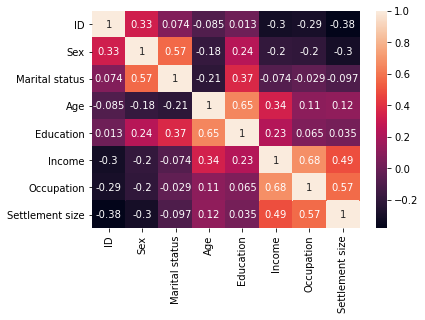

In [ ]:
sns.heatmap(cor,annot=True)

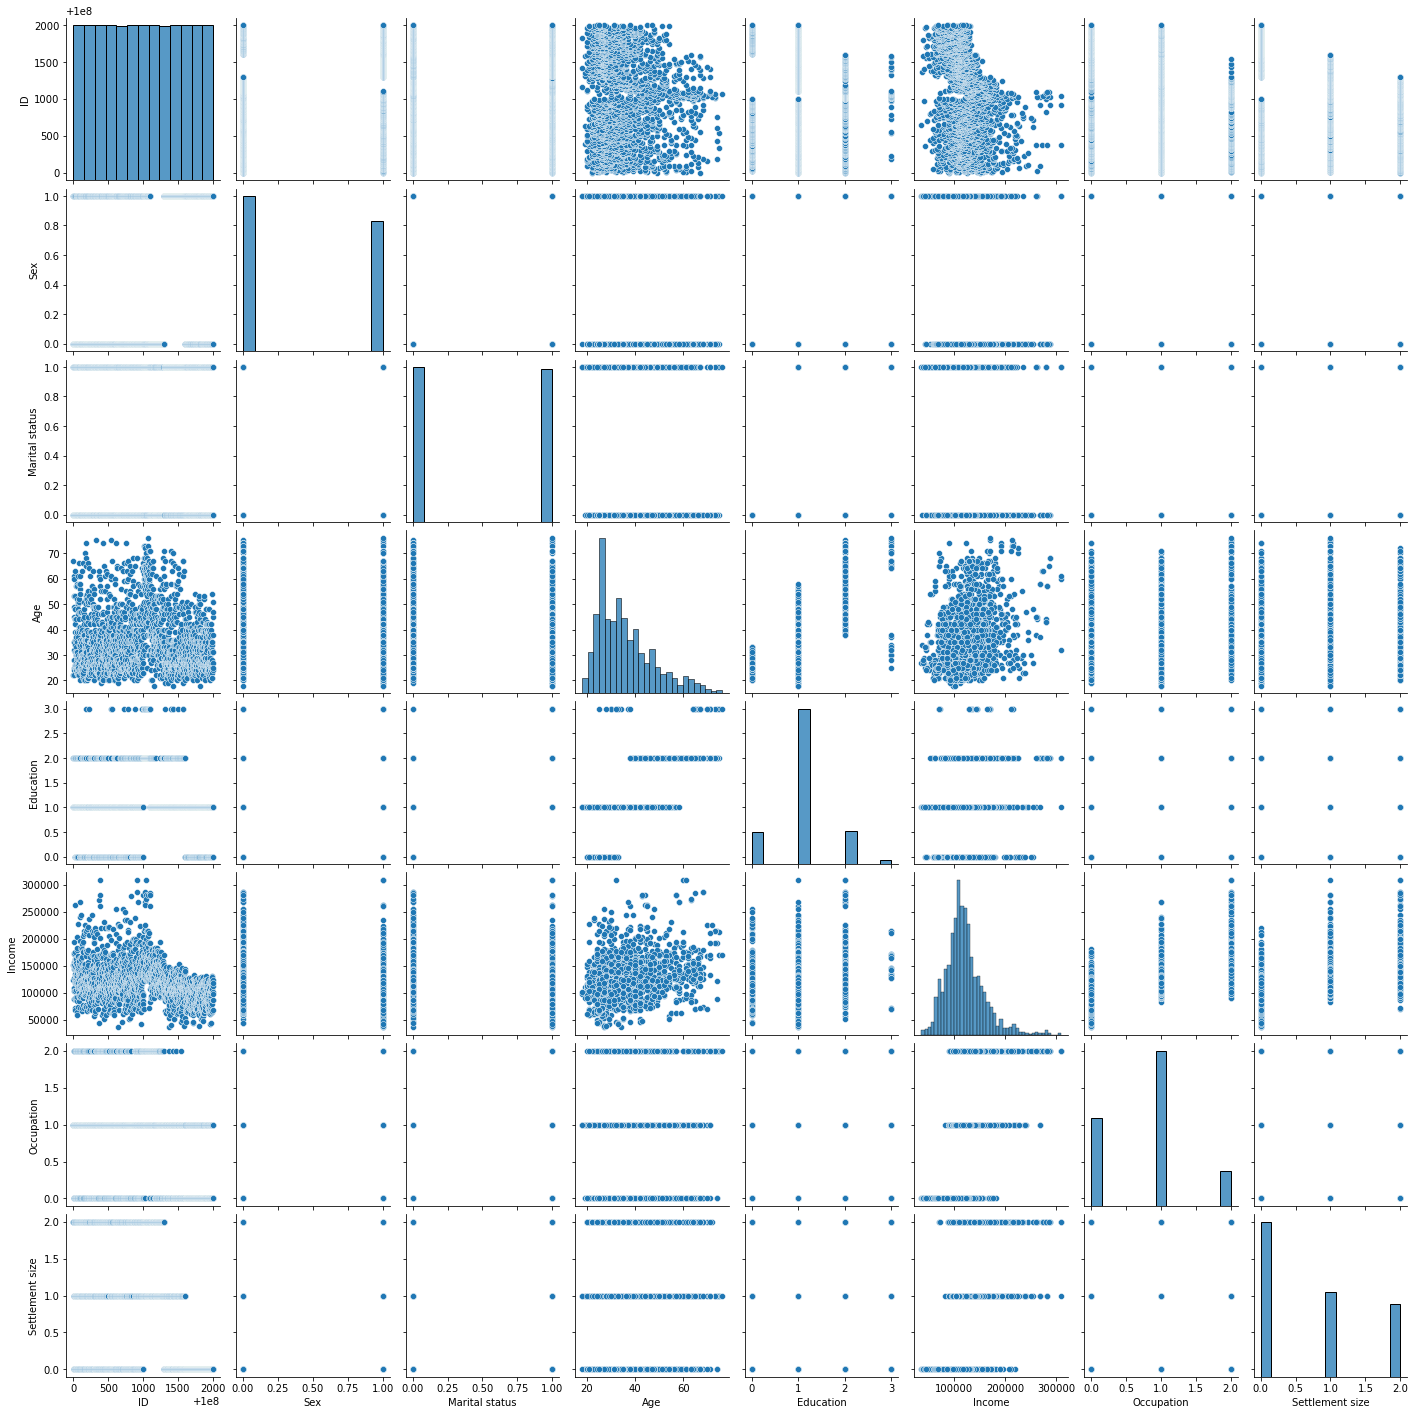

In [ ]:
sns.pairplot(data)

In [ ]:
data.drop(columns=['ID'],axis=1,inplace=True)

In [ ]:
data.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1


In [ ]:
names = data.columns

In [ ]:
data.isna().sum()

Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [ ]:
from sklearn import preprocessing

In [ ]:
data = preprocessing.minmax_scale(data,feature_range=(0,1))  #scaling the data

In [ ]:
data

array([[0.        , 0.        , 0.84482759, ..., 0.32478101, 0.5       ,
        1.        ],
       [1.        , 1.        , 0.06896552, ..., 0.42021043, 0.5       ,
        1.        ],
       [0.        , 0.        , 0.53448276, ..., 0.19514353, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.22413793, ..., 0.18487051, 0.        ,
        0.        ],
       [1.        , 1.        , 0.10344828, ..., 0.22716172, 0.        ,
        0.        ],
       [0.        , 0.        , 0.12068966, ..., 0.11912317, 0.        ,
        0.        ]])

In [ ]:
data = pd.DataFrame(data,columns=names) #scaled data will convert to array,so converting to dataframe

In [ ]:
data.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0.0,0.0,0.844828,0.666667,0.324781,0.5,1.0
1,1.0,1.0,0.068966,0.333333,0.420210,0.5,1.0
2,0.0,0.0,0.534483,0.333333,0.195144,0.0,0.0
3,0.0,0.0,0.465517,0.333333,0.496223,0.5,0.5
4,0.0,0.0,0.603448,0.333333,0.413842,0.5,0.5


In [ ]:
# using dendogram to find optimal no of clusters
import scipy.cluster.hierarchy as sch
import matplotlib as plt

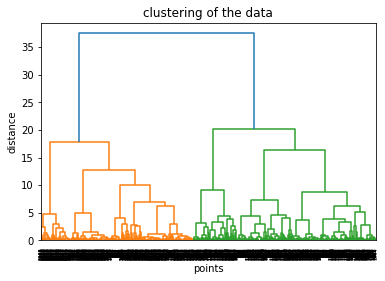

In [ ]:
dendogram = sch.dendrogram(sch.linkage(data,method="ward")) # calculates euclidean distance and classfy by default
plt.pyplot.title('clustering of the data')
plt.pyplot.ylabel('distance')
plt.pyplot.xlabel('points')
plt.pyplot.show()

In [ ]:
from sklearn import cluster
import sklearn as sk

In [ ]:
clus = cluster.AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage='complete')
clus

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [ ]:
clus.fit(data)

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [ ]:
abc = clus.fit_predict(data)

In [ ]:
hclusdata = pd.DataFrame(data,pd.Series(abc))

# Creating a labled data with the help of clustering model 

In [ ]:
hclusdata['clus']= pd.Series(abc)

In [ ]:
hclusdata.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,clus
1,1.0,1.0,0.068966,0.333333,0.420210,0.5,1.0,0
0,0.0,0.0,0.844828,0.666667,0.324781,0.5,1.0,1
1,1.0,1.0,0.068966,0.333333,0.420210,0.5,1.0,0
1,1.0,1.0,0.068966,0.333333,0.420210,0.5,1.0,0
1,1.0,1.0,0.068966,0.333333,0.420210,0.5,1.0,0


# K-means clustering

In [ ]:
from scipy import spatial

In [ ]:
wcss = []
for i in range(1,11):
    kmeans = cluster.KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(hclusdata)
    wcss.append(kmeans.inertia_)

<ipython-input-56-ca99df456560>:4: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  kmeans.fit(hclusdata)
<ipython-input-56-ca99df456560>:4: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  kmeans.fit(hclusdata)
<ipython-input-56-ca99df456560>:4: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  kmeans.fit(hclusdata)
<ipython-input-56-ca99df456560>:4: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  kmeans.fit(hclusdata)
<ipython-input-56-ca99df456560>:4: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  kmeans.fit(hclusdata)
<ipython-input-56-ca99df456560>:4: ConvergenceWarning: Number of distinct c

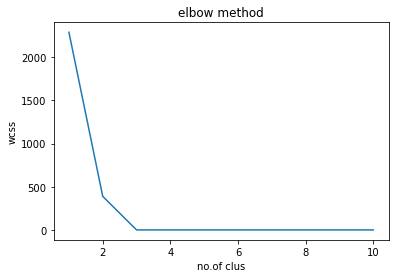

In [ ]:
plt.pyplot.plot(range(1,11),wcss)
plt.pyplot.title('elbow method')
plt.pyplot.xlabel('no.of clus')
plt.pyplot.ylabel('wcss')
plt.pyplot.show()

In [ ]:
km_model = cluster.KMeans(n_clusters=3,init='k-means++',random_state=0)

In [ ]:
ykmeans = km_model.fit_predict(data)

In [ ]:
data.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0.0,0.0,0.844828,0.666667,0.324781,0.5,1.0
1,1.0,1.0,0.068966,0.333333,0.420210,0.5,1.0
2,0.0,0.0,0.534483,0.333333,0.195144,0.0,0.0
3,0.0,0.0,0.465517,0.333333,0.496223,0.5,0.5
4,0.0,0.0,0.603448,0.333333,0.413842,0.5,0.5


In [ ]:
data['kclus'] = pd.Series(ykmeans)

In [ ]:
data.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,kclus
0,0.0,0.0,0.844828,0.666667,0.324781,0.5,1.0,2
1,1.0,1.0,0.068966,0.333333,0.420210,0.5,1.0,1
2,0.0,0.0,0.534483,0.333333,0.195144,0.0,0.0,0
3,0.0,0.0,0.465517,0.333333,0.496223,0.5,0.5,2
4,0.0,0.0,0.603448,0.333333,0.413842,0.5,0.5,2
